In [7]:
# 步骤1: 设置带有示例的系统提示词
image_prompt = ('''你是一个乐于助人的AI助手。这次对话的一个特点是你可以访问图像生成API,所以如果用户要求你创建图像,或者你有一个特别相关或深刻的图像创意,你就可以创建图像。
                   请写'<img_prompt>(提示词)</img_prompt>',将提示词替换为你想要创建的图像描述。''')

image_prompt += """

为获得尽可能好的图像,请遵循以下5条原则:

1. 简洁明了:使用简洁、具体的词语描述图像,避免抽象或模棱两可的表达。
2. 丰富细节:在不影响简洁性的前提下,适度添加细节,使图像更生动、更有说服力。
3. 合理构图:考虑图像的整体构图,如主体、背景、色彩搭配等,力求协调、平衡。
4. 情感表达:根据图像的主题和目的,适当加入情感元素,以引发共鸣、思考或美感体验。
5. 创新独特:鼓励创新和独特的表现方式,避免陈词滥调,努力创造令人眼前一亮的视觉效果。

例如,如果我问"爱因斯坦是如何提出相对论的?",你可以这样生成一个图像:

<img_prompt>年轻的爱因斯坦坐在书桌前,周围散落着满是计算和公式的纸张,他全神贯注地凝视前方,仿佛在思考宇宙的奥秘。房间里光线昏暗,只有一束光照亮了他的侧脸,突出了他专注、智慧的神情。</img_prompt>

如果你决定进行函数调用:
- 调用语法将不会显示给用户,但你创建的图像会显示。 
- 请将调用放在你的文本响应(如果有的话)之后。
"""

In [8]:
# 步骤2: 用Claude等文本模型生成图片提示
import anthropic
MODEL_NAME = "claude-3-opus-20240229" 
CLIENT = anthropic.Anthropic()

# 定义与Claude交互的函数
def image_prompt_claude(prompt):
    claude_response = CLIENT.messages.create(
        system=image_prompt,
        model=MODEL_NAME,
        max_tokens=1024,
        messages=[
          {"role": "user", "content": prompt}
        ],
    ).content[0].text
    return claude_response

# 与Claude交互,获取图像提示词
claude_response = image_prompt_claude("图灵是如何为现代计算机奠定基础的?")
print('Clause给出的提示词: ', claude_response)

Clause给出的提示词:  艾伦·图灵被公认为现代计算机科学之父,他的理论和实践工作为现代计算机的诞生奠定了基础。以下是图灵的几个主要贡献:

1. 图灵机理论:1936年,图灵提出了一种抽象的计算模型,即图灵机。它由一条无限长的纸带和一个可以在纸带上移动、读写符号的读写头组成。图灵证明,图灵机可以模拟任何可计算的数学函数。这为现代计算机的逻辑结构提供了理论基础。

2. 可计算性理论:图灵进一步研究了哪些数学问题可以用算法来解决,提出了"可判定性"概念,即问题是否存在算法在有限步骤内解决。他证明了停机问题等重要问题是不可判定的。这些研究奠定了计算复杂性理论的基础。

3. 破解德军密码:二战期间,图灵领导的团队成功破解了德国的英格玛密码机。他设计了电子计算机"胜利"号来破译密码,大大缩短了战争进程。这是现代计算机的雏形。

4. 人工智能:1950年,图灵提出了"图灵测试",用于判断机器是否具有智能。在一次书面交流中,如果人类无法区分对方是人还是机器,就可以认为机器具有智能。这开创了人工智能的先河。

5. 计算机程序存储:图灵首次提出,计算机程序和数据可以存储在同一个内存中。这种"存储程序"的概念成为现代计算机的核心特征之一。

<img_prompt>黑白素描画,年轻的艾伦·图灵正在专注地工作。他坐在桌前,面前摆放着图灵机模型,由一条长纸带和读写头组成。图灵一手托着下巴,眼神专注而深邃,仿佛在思考计算的本质奥秘。桌上和纸带上密密麻麻写满了数学符号和公式。背景衬以简洁的线条,突出图灵的专注神情和深刻思想。</img_prompt>

图灵以他非凡的洞见力和严谨的逻辑思维,为现代计算机科学奠定了坚实的理论和实践基础。他不仅是伟大的科学家,更是改变世界的思想先驱。正如他所说:"我相信,在50年内,就可以造出储存容量为109的机器,到那时,人们就会认为这种机器能思考了。"图灵预言成真,数字计算机由此诞生,开启了人类社会的新纪元。


In [21]:
# 步骤3: 解析Claude的响应
import re

def parse_response(claude_response):
    image_prompt_match = re.search(r'<img_prompt>(.*?)</img_prompt>', claude_response)
    if image_prompt_match:
        image_prompt = image_prompt_match.group(1)
        text_response = re.sub(r'<img_prompt>.*?</img_prompt>', '', claude_response)
    else:
        image_prompt = None
        text_response = claude_response
    return text_response.strip(), image_prompt

text_response, image_prompt = parse_response(claude_response)
print('解析Clause给出的text_response提示词: ', '\n', text_response, '\n')
print('解析Clause给出的image_prompt提示词:: ', '\n', image_prompt)

解析Clause给出的text_response提示词:  
 艾伦·图灵被公认为现代计算机科学之父,他的理论和实践工作为现代计算机的诞生奠定了基础。以下是图灵的几个主要贡献:

1. 图灵机理论:1936年,图灵提出了一种抽象的计算模型,即图灵机。它由一条无限长的纸带和一个可以在纸带上移动、读写符号的读写头组成。图灵证明,图灵机可以模拟任何可计算的数学函数。这为现代计算机的逻辑结构提供了理论基础。

2. 可计算性理论:图灵进一步研究了哪些数学问题可以用算法来解决,提出了"可判定性"概念,即问题是否存在算法在有限步骤内解决。他证明了停机问题等重要问题是不可判定的。这些研究奠定了计算复杂性理论的基础。

3. 破解德军密码:二战期间,图灵领导的团队成功破解了德国的英格玛密码机。他设计了电子计算机"胜利"号来破译密码,大大缩短了战争进程。这是现代计算机的雏形。

4. 人工智能:1950年,图灵提出了"图灵测试",用于判断机器是否具有智能。在一次书面交流中,如果人类无法区分对方是人还是机器,就可以认为机器具有智能。这开创了人工智能的先河。

5. 计算机程序存储:图灵首次提出,计算机程序和数据可以存储在同一个内存中。这种"存储程序"的概念成为现代计算机的核心特征之一。



图灵以他非凡的洞见力和严谨的逻辑思维,为现代计算机科学奠定了坚实的理论和实践基础。他不仅是伟大的科学家,更是改变世界的思想先驱。正如他所说:"我相信,在50年内,就可以造出储存容量为109的机器,到那时,人们就会认为这种机器能思考了。"图灵预言成真,数字计算机由此诞生,开启了人类社会的新纪元。 

解析Clause给出的image_prompt提示词::  
 黑白素描画,年轻的艾伦·图灵正在专注地工作。他坐在桌前,面前摆放着图灵机模型,由一条长纸带和读写头组成。图灵一手托着下巴,眼神专注而深邃,仿佛在思考计算的本质奥秘。桌上和纸带上密密麻麻写满了数学符号和公式。背景衬以简洁的线条,突出图灵的专注神情和深刻思想。


In [15]:
# 步骤4: 连接Dall-E API生成图片
from openai import OpenAI
openai = OpenAI()

def generate_image(prompt, height=1024, width=1024, num_samples=1):
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size=f"{height}x{width}",
        quality="standard",
        n=num_samples,
    )
    # 假设响应包含生成图像的URL
    image_url = response.data[0].url
    return image_url

# 根据解析结果决定是否生成图像
if image_prompt:
    image_url = generate_image(image_prompt)
else:
    print("Claude没有给出生成图像的提示。")

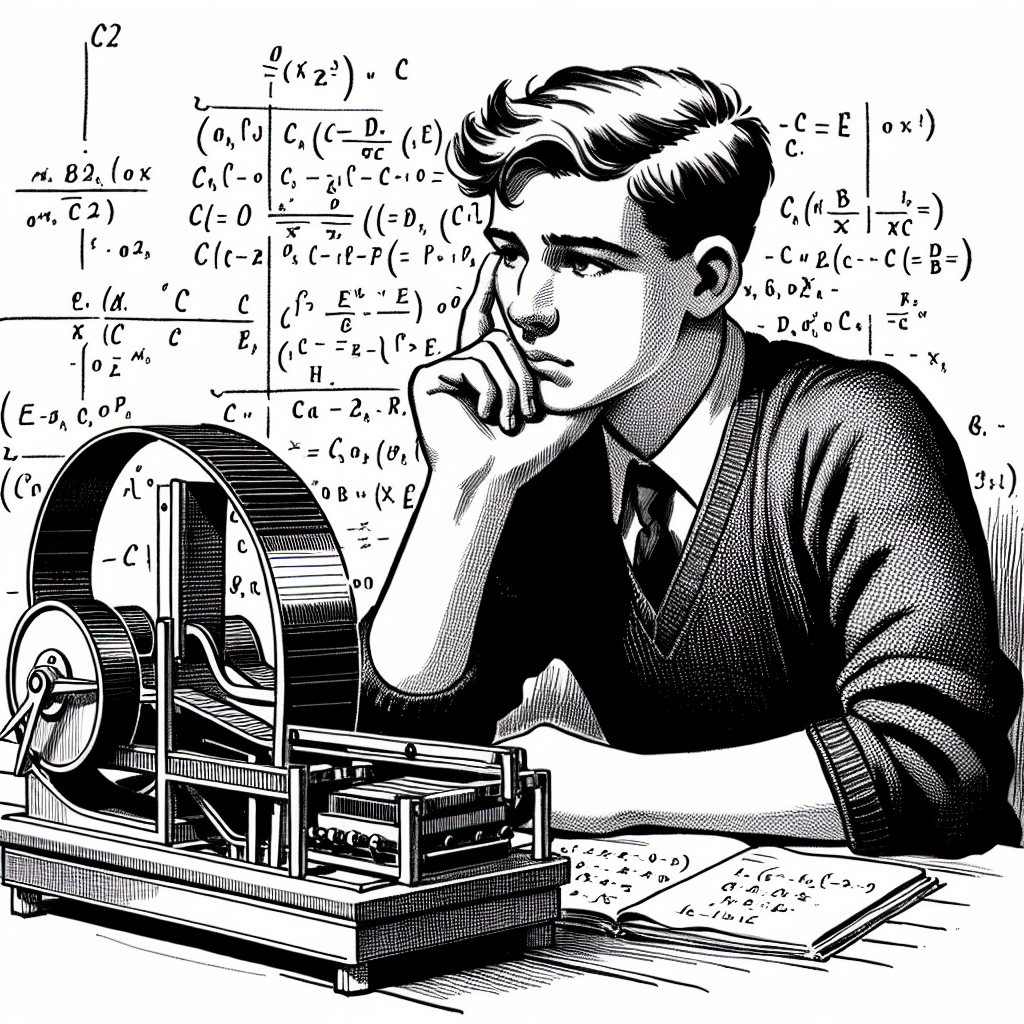

In [16]:
import requests
from IPython.display import display, Image

def display_image(image_url):
    # 假设该函数收到图像的URL,它需要获取并显示图像。
    response = requests.get(image_url)
    image = Image(response.content)
    display(image)

display_image(image_url)

In [22]:
# 定义一个函数,将中文文本翻译为英文
def translate_to_english(chinese_text):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a translator."},
            {"role": "user", "content": f"Translate the following Chinese text to English: {chinese_text}"}
        ]
    )
    translation = response.choices[0].message.content
    return translation.strip()

# 将中文图像提示词翻译为英文
english_image_prompt = translate_to_english(image_prompt)
print("英文图像提示词:", english_image_prompt)

English Translation: The black and white sketch depicts a young Alan Turing working attentively. He is sitting at a table with a model of the Turing machine in front of him, consisting of a long paper tape and a read/write head. Turing is holding his chin in one hand, with a focused and deep gaze, as if contemplating the mysteries of computation. The table and paper tape are covered with densely written mathematical symbols and formulas. The background is adorned with simple lines, highlighting Turing's focused expression and profound thoughts.


sk-anHZ4cXPhWfixvQkMaJVf7QY0agNcxZA5YWT7cRWtd75hJgH


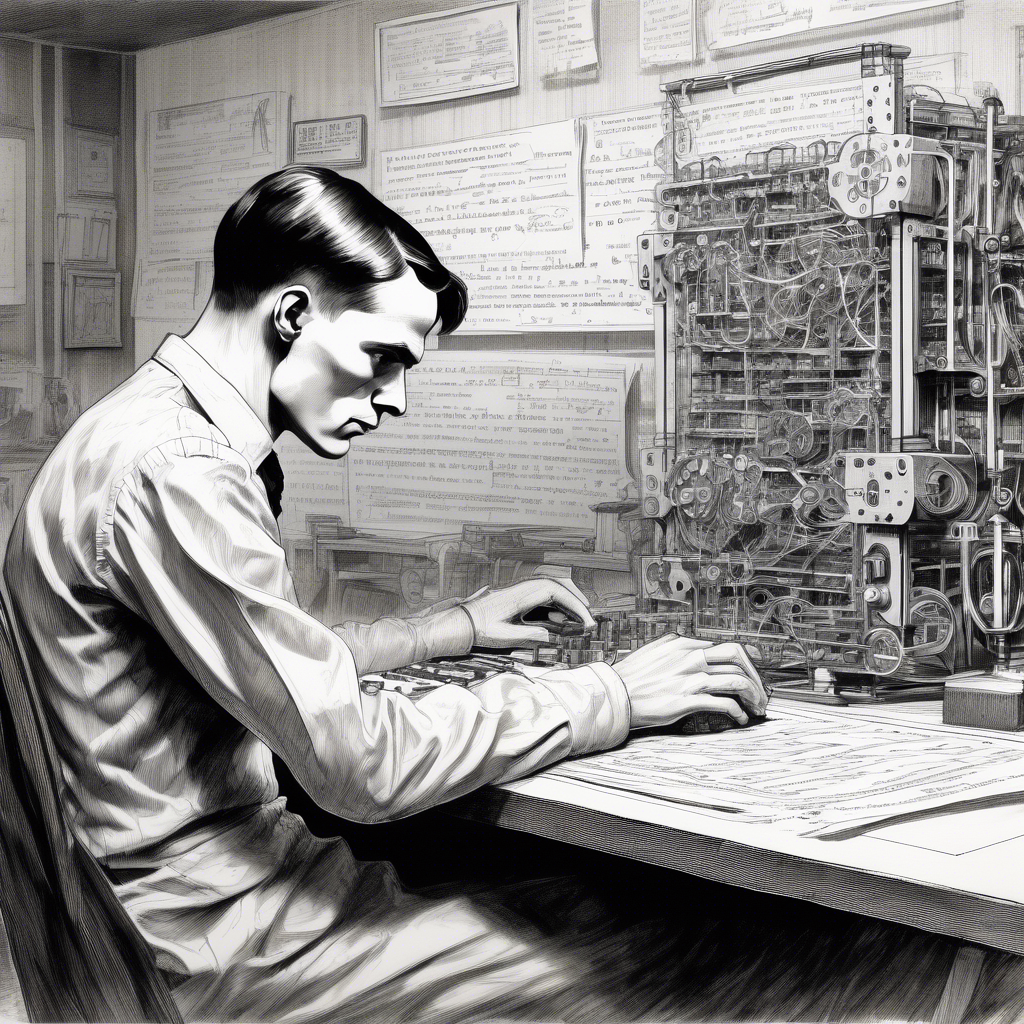

In [25]:
import requests
import os
from dotenv import load_dotenv

# 加载 .env 文件中的环境变量
load_dotenv()  

# 从环境变量中获取 API 密钥
STABILITY_API_KEY = os.getenv("STABILITY_API_KEY")

def generate_image_sd(prompt, height=1024, width=1024, num_samples=1):
    engine_id = "stable-diffusion-v1-6"
    api_host = 'https://api.stability.ai'

    # 发送 POST 请求生成图像
    response = requests.post(
        f"{api_host}/v1/generation/{engine_id}/text-to-image",
        headers={
            "Content-Type": "application/json",
            "Accept": "application/json",
            "Authorization": f"Bearer {STABILITY_API_KEY}"
        },
        json={
            "text_prompts": [
                {
                    "text": prompt,  # 使用传入的提示词
                }
            ],
            "cfg_scale": 7,  # 配置比例，影响生成图像的多样性
            "height": height,  # 图像高度
            "width": width,  # 图像宽度
            "samples": num_samples,  # 生成图像的数量
            "steps": 30,  # 生成图像的步数
        },
    )

    # 检查响应状态码，如果不是 200，抛出异常
    if response.status_code != 200:
        raise Exception("Non-200 response: " + str(response.text))

    # 解析 JSON 响应数据
    data = response.json()
    return data['artifacts'][0]['base64']  # 返回生成的图像的 base64 编码

from base64 import b64decode
from IPython.display import Image, display

# 生成图像的提示词
english_image_prompt = "A black-and-white photo style depicting a young Alan Turing intensely focused on deriving calculations on paper. The desk and floor are scattered with sheets filled with formulas and symbols, giving the impression of a genius deep in thought. The background is slightly blurred to highlight Turing's concentrated gaze and the flow of his thoughts."

# 调用函数生成图像
base64_image = generate_image_sd(english_image_prompt)

# 解码 base64 编码的图像数据
image_data = b64decode(base64_image)

# 显示图像
display(Image(image_data))


In [23]:
import requests
import os
from dotenv import load_dotenv
load_dotenv()  

STABILITY_API_KEY = os.getenv("STABILITY_API_KEY")

def send_generation_request(
    host,
    params,
):
    headers = {
        "Accept": "image/*",
        "Authorization": f"Bearer {STABILITY_API_KEY}"
    }

    # Encode parameters
    files = {}
    image = params.pop("image", None)
    mask = params.pop("mask", None)
    if image is not None and image != '':
        files["image"] = open(image, 'rb')
    if mask is not None and mask != '':
        files["mask"] = open(mask, 'rb')
    if len(files)==0:
        files["none"] = ''

    # Send request
    print(f"Sending REST request to {host}...")
    response = requests.post(
        host,
        headers=headers,
        files=files,
        data=params
    )
    if not response.ok:
        raise Exception(f"HTTP {response.status_code}: {response.text}")

    return response

#Use SD3 Large

image_prompt = english_image_prompt
negative_prompt = "" 
aspect_ratio = "16:9" 
seed = 0 
output_format = "jpeg" 

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "prompt" : image_prompt,
    "negative_prompt" : negative_prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format" : output_format,
    "model" : "sd3-large",
    "mode" : "text-to-image"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")
display(Image(generated))

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_237305510.jpeg
Result image:


AttributeError: type object 'Image' has no attribute 'open'

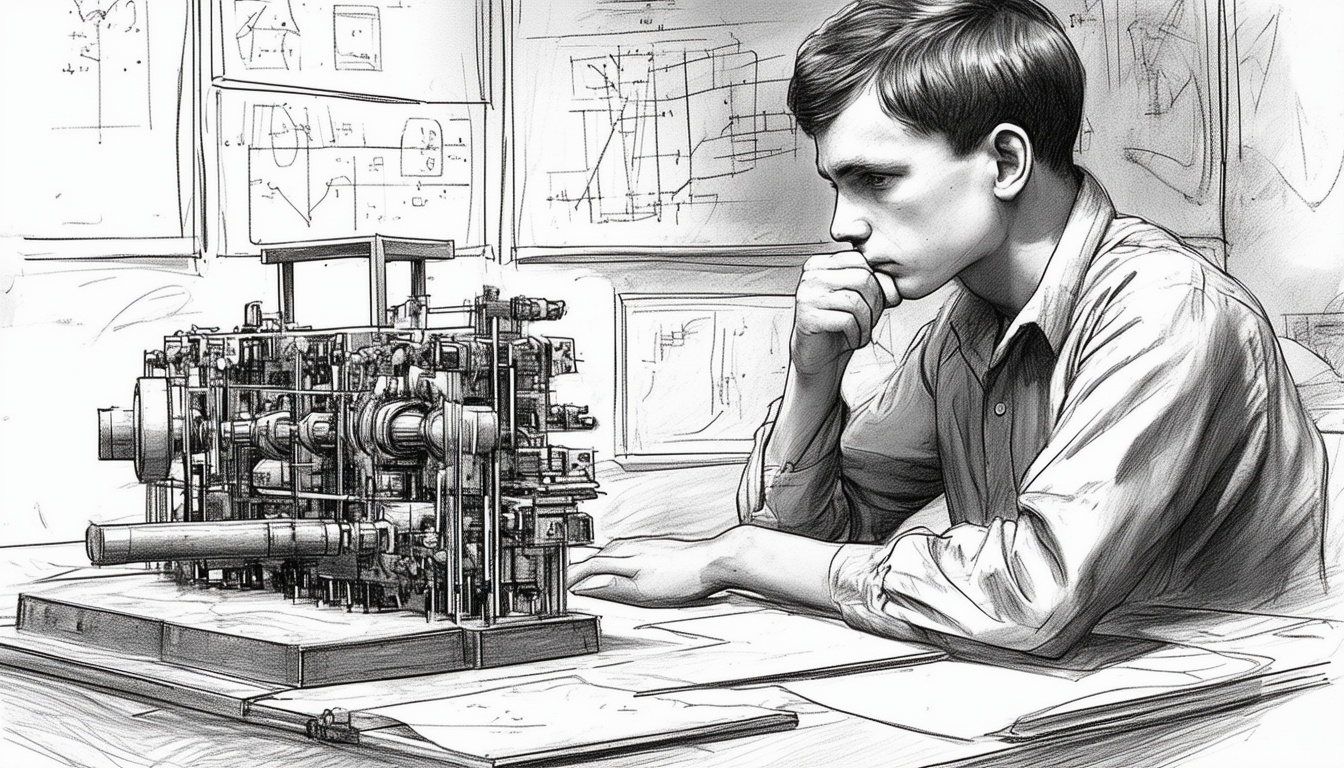

In [24]:
display(Image(generated))